# 02718 HW 1
## Name: Anushka Sinha
## andrewID: anushka3

In [397]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import f1_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

### 1. The first thing you decide to look at is whether the cell’s gene expression can be used to separate the cells into the different cell types (see the “cell_ontology_class” class column in the “brain_metadata” file).

a. By looking at the “brain_metadata” file, how many different cell types do you observe? (5 pts)



In [398]:
metadata = pd.read_csv ('brain_metadata.csv')
print(metadata['cell_ontology_class'].unique())
print("Number of different cell types: ", metadata['cell_ontology_class'].nunique())

['astrocyte' 'oligodendrocyte' 'endothelial cell' 'neuron'
 'oligodendrocyte precursor cell' 'Bergmann glial cell' 'brain pericyte']
Number of different cell types:  7


b. Now we want to begin looking at clustering cells in the data. However, to visualize our data which currently has a large number of dimensions (i.e. genes, shown in the columns, in the “brain_cancer_counts.csv” file), we must reduce our dimensions to 2. Therefore, perform a PCA on your gene expression data and include the plot of your results from the PCA below. If you are not familiar with PCA, feel free to follow the following tutorial

In [399]:
cancerData= pd.read_csv("brain_cancer_counts.csv")
cancerData.shape

(3401, 13049)

In [400]:
# Loading the data and normalizing it
cancerData= pd.read_csv("brain_cancer_counts.csv")
X = cancerData.iloc[:, 1:]
cancerDataScaled = StandardScaler().fit_transform(X)
print("Mean", np.mean(cancerDataScaled))
print("Standard Deviation",np.std(cancerDataScaled))
print(cancerDataScaled.shape)

Mean 1.3209718789251463e-20
Standard Deviation 0.9999999999999993
(3401, 13048)


In [401]:
# PCA
cancerDataPCA = PCA(n_components=2)
principalComponents = cancerDataPCA.fit_transform(cancerDataScaled)


principalComponentsDf = pd.DataFrame(data = principalComponents
                            , columns = ['PC1', 'PC2'])
principalComponentsDf['cell'] = cancerData['Cell'] 
principalComponentsDf      

,PC1,PC2,cell
0,-11.296994,3.703260,A1.B003290.3_38_F.1.1
1,-6.311199,3.136022,A1.B003728.3_56_F.1.1
2,11.444665,-15.273087,A1.MAA000560.3_10_M.1.1
3,-16.836592,5.385748,A1.MAA000564.3_10_M.1.1
4,-20.651683,-0.122417,A1.MAA000923.3_9_M.1.1
...,...,...,...
3396,-19.116243,-0.027527,P9.MAA000926.3_9_M.1.1
3397,-15.538216,-1.343031,P9.MAA000930.3_8_M.1.1
3398,-12.017036,8.008912,P9.MAA000932.3_11_M.1.1
3399,-10.070091,-7.328348,P9.MAA000935.3_8_M.1.1


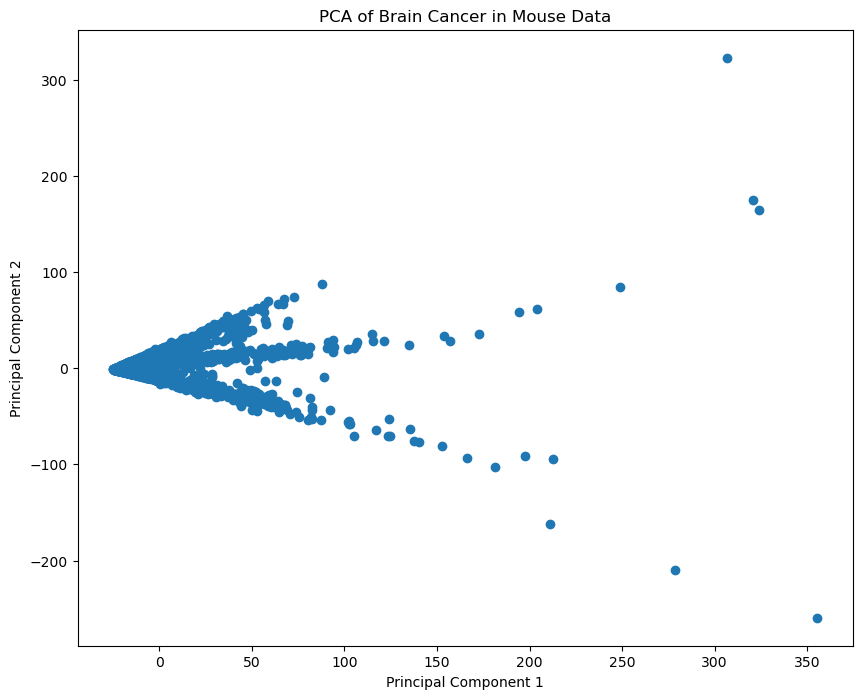

In [402]:
plt.figure(figsize=(10, 8))
plt.scatter(x=principalComponentsDf['PC1'], y=principalComponentsDf['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Brain Cancer in Mouse Data')
plt.show()

c. We will now perform K-means clustering on our gene expression data. By looking
at your PCA plot, hypothesize how many clusters (K) of the cell types are present
in the dataset and annotate your plot from question 1b to demonstrate these K
clusters. (5 pts) 

![Image Name](1c.png)

d. In this problem, we assume that we know the ground truth on the number of
clusters we should expect to have in our dataset, i.e., it is the number of
different cell types in the metadata which is the answer to question 1a.
Therefore, perform K-means clustering with K = # of different cell types. Provide
the plot below. Use 20 random initializations. (15 pts)

In [403]:
K = 7
kmeans = KMeans(n_clusters=K, n_init=20)
cancerDataClusters = kmeans.fit(principalComponents)
labels = cancerDataClusters.labels_
labels

array([6, 6, 0, ..., 6, 6, 6], dtype=int32)

In [404]:
principalComponentsDf["Cluster #"] = labels 
d = dict()
for w in range(len(labels)):
    if not(labels[w] in d.keys()):
        d[labels[w]] = 1
    else:
        d[labels[w]] += 1
print(d)

{6: 1965, 0: 605, 1: 537, 2: 108, 3: 172, 5: 8, 4: 6}


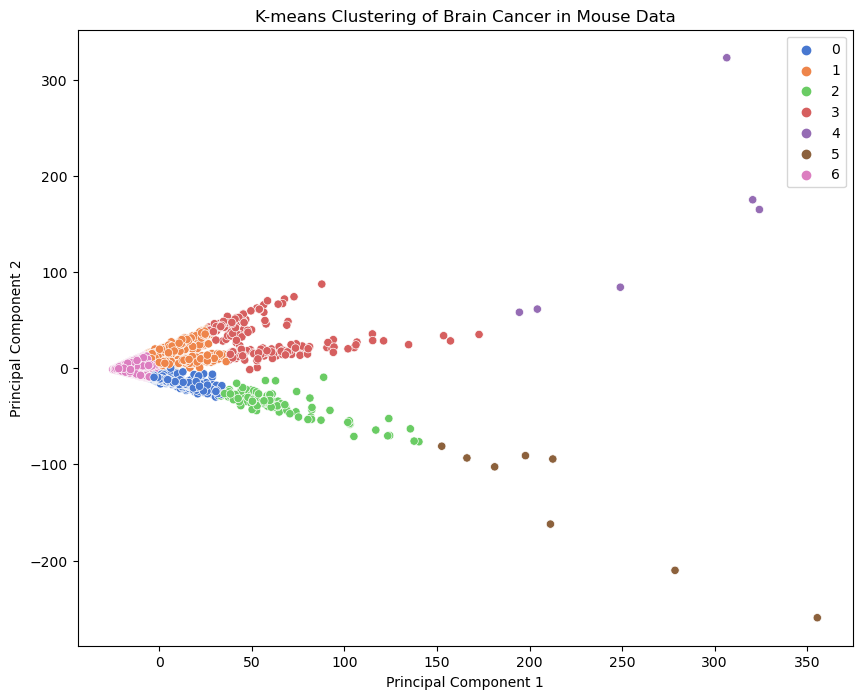

In [405]:
x_axis = principalComponentsDf['PC1']
y_axis = principalComponentsDf['PC2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=principalComponentsDf['Cluster #'], palette="muted")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Brain Cancer in Mouse Data')
plt.legend()
plt.show()

### 2. Although we were able to perform clustering on our data, we want to evaluate our clusters.

a. To start, let’s perform some internal evaluations. Compute the Silhouette
coefficient and explain what the value you got means in regard to the clustering.
(5 pts)

In [406]:
silhouetteCoeff = silhouette_score(principalComponents, labels)
print(silhouetteCoeff)


0.5101277974042701


b. Since we have knowledge that we didn’t use in the clustering, we can perform
additional evaluations. Annotate each cell by color-coding it in the PCA plot to
represent what the true “cell_ontology_class” of the cell is according to the
metadata file, and use a different annotation method (e.g., different symbols) on
top of this plot to represent what cluster that cell represents. (10 pts)

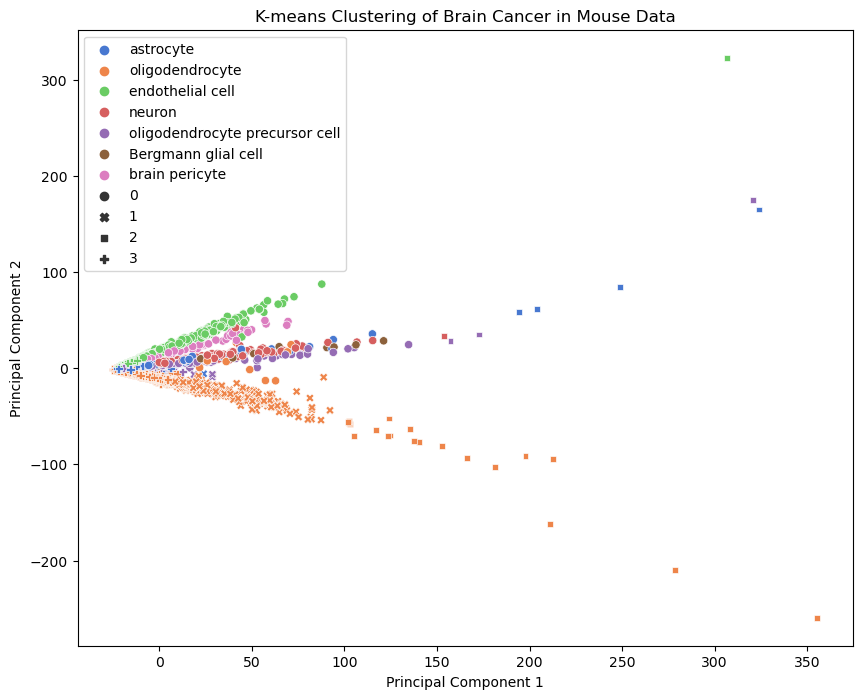

In [418]:
mergedDf = pd.merge(principalComponentsDf, metadata, on="cell", how="inner")
x_axis = mergedDf['PC1']
y_axis = mergedDf['PC2']
plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue='cell_ontology_class', palette="muted", style=labels, data=mergedDf)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering of Brain Cancer in Mouse Data')
plt.legend(loc='upper left')
plt.show()

c. How well was K-means clustering in separating the cells based on the “true” cell
types? Answer this by providing the F-measure of the clustering and what the
value means in relation to the clusters

In [408]:
# Create a dictionary to store DataFrames for each cluster
cluster_dataframes = {}


for cluster_number in mergedDf['Cluster #'].unique():
    cluster_dataframes[cluster_number] = mergedDf[mergedDf['Cluster #'] == cluster_number]
cluster_dataframes[0]



,PC1,PC2,cell,Cluster #,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode
2,11.444665,-15.273087,A1.MAA000560.3_10_M.1.1,0,oligodendrocyte,Cortex,M,3_10_M,MAA000560
18,3.749582,-13.146980,A10.MAA000941.3_8_M.1.1,0,oligodendrocyte,Hippocampus,M,3_8_M,MAA000941
19,7.114504,-17.077075,A10.MAA000944.3_9_M.1.1,0,oligodendrocyte,Cortex,M,3_9_M,MAA000944
25,6.197361,-3.159125,A11.MAA000561.3_10_M.1.1,0,oligodendrocyte precursor cell,Cortex,M,3_10_M,MAA000561
28,27.430405,-24.832906,A11.MAA000902.3_11_M.1.1,0,oligodendrocyte,Striatum,M,3_11_M,MAA000902
...,...,...,...,...,...,...,...,...,...
3363,-4.420857,-9.281356,P5.MAA000935.3_8_M.1.1,0,oligodendrocyte,Hippocampus,M,3_8_M,MAA000935
3371,30.581353,-24.210104,P6.MAA000902.3_11_M.1.1,0,oligodendrocyte,Striatum,M,3_11_M,MAA000902
3378,-3.584418,-8.546930,P7.MAA000560.3_10_M.1.1,0,oligodendrocyte,Cortex,M,3_10_M,MAA000560
3390,4.559826,-11.885035,P8.MAA000564.3_10_M.1.1,0,oligodendrocyte,Striatum,M,3_10_M,MAA000564


In [409]:
clusterCellTypes = {}
for i in cluster_dataframes.keys():
    clusterCellTypes[i] = {}
    for cellType in cluster_dataframes[i]['cell_ontology_class']:
        if cellType in clusterCellTypes[i].keys():
            clusterCellTypes[i][cellType] += 1
        else:
            clusterCellTypes[i][cellType] = 1
clusterCellTypes

{6: {'astrocyte': 334,
  'endothelial cell': 443,
  'oligodendrocyte': 853,
  'neuron': 130,
  'oligodendrocyte precursor cell': 104,
  'brain pericyte': 76,
  'Bergmann glial cell': 25},
 0: {'oligodendrocyte': 589,
  'oligodendrocyte precursor cell': 9,
  'astrocyte': 6,
  'brain pericyte': 1},
 1: {'oligodendrocyte precursor cell': 64,
  'endothelial cell': 219,
  'neuron': 103,
  'astrocyte': 74,
  'brain pericyte': 59,
  'oligodendrocyte': 12,
  'Bergmann glial cell': 6},
 2: {'oligodendrocyte': 108},
 3: {'Bergmann glial cell': 9,
  'oligodendrocyte precursor cell': 25,
  'neuron': 48,
  'brain pericyte': 20,
  'endothelial cell': 52,
  'astrocyte': 14,
  'oligodendrocyte': 4},
 5: {'oligodendrocyte': 8},
 4: {'astrocyte': 4,
  'oligodendrocyte precursor cell': 1,
  'endothelial cell': 1}}

In [416]:
clusterCellAssignment = dict()
clusterCellAssignment[0]= "oligodendrocyte"
clusterCellAssignment[1]= 'neuron'
clusterCellAssignment[2]= 'brain pericyte'
clusterCellAssignment[3]= 'oligodendrocyte precursor cell'
clusterCellAssignment[4]= 'astrocyte'
clusterCellAssignment[5]= 'Bergmann glial cell'
clusterCellAssignment[6]= 'endothelial cell'


In [417]:
predictedLabels = [clusterCellAssignment[label] for label in labels]
f_measure = f1_score(mergedDf['cell_ontology_class'], predictedLabels, average='weighted')
print('f measure: ', f_measure)

f measure:  0.012823828832172025


### 3. After performing that analysis, you chose to look further into the other most significant variable present in the metadata, the origin where the cell was cultured from (see the “subtissue” column in the metadata file). Choose another clustering technique besides K-means (i.e. Hierarchical Clustering, Gaussian Mixture Models, Density-based Models) you learned in class, cluster the gene expression data and provide the plot. Afterwards provide a brief description of your results addressing the final criteria: (1) what clustering technique did you choose, (2) how well did the data cluster using that technique (using two evaluation methods to justify your answer) and (3) what conclusions (express in both technical and in laymen terms) might you make from this analysis that can be used to further explore glioblastomas in mice. (40 pts)


In [412]:
print(metadata['subtissue'].unique())
print("Number of different cell types: ", metadata['subtissue'].nunique())

['Striatum' 'Cortex' 'Hippocampus' 'Cerebellum']
Number of different cell types:  4


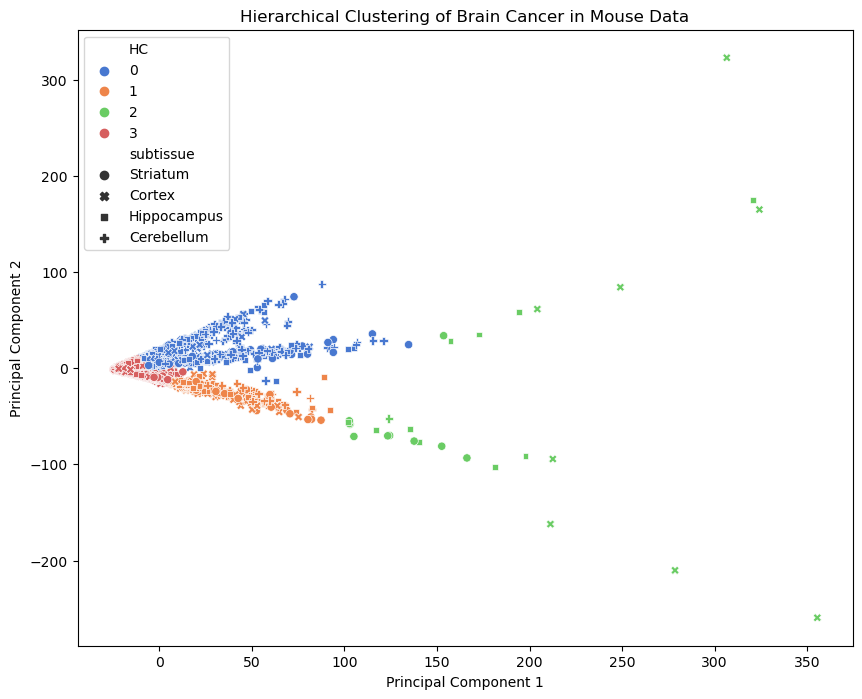

In [413]:
# 1
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hc.fit_predict(principalComponents)
mergedDf['HC'] = labels
x_axis = mergedDf['PC1']
y_axis = mergedDf['PC2']


plt.figure(figsize=(10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=mergedDf['HC'],  style= 'subtissue', palette="muted", data=mergedDf)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Hierarchical Clustering of Brain Cancer in Mouse Data')
plt.legend()
plt.show()

In [414]:
# 2. 
# Evaluation methods for hierarchical clusterin
score1 = silhouette_score(principalComponents, labels)
print("Silhouette Coefficient is ", score1)
score2 = davies_bouldin_score(principalComponents, labels)
print("Davies Bouldin score is ", score2)


Silhouette Coefficient is  0.4575745114399309
Davies Bouldin score is  0.9420178677841168
